In [6]:
import pandas as pd
#reading the glass.csv file
gdata=pd.read_csv('glass.csv')
gdata


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
# importing libraries for Naive Bayes and SVM
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:
#question1
#spliting the data into training and testing parts
X=gdata.drop('Type',axis=1)
y=gdata['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [12]:
#Implementing Naïve Bayes method using the scikit-learn library
classifier = GaussianNB()       #creating an instance

classifier.fit(X_train, y_train)

#Predicting the labels for the testing data:
y_pred = classifier.predict(X_test)
# Evaluating the model on test part using score and clasification_report(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [13]:
#question 2
#implementing svm
classifier=svm.SVC()              #creating an instance

classifier.fit(X_train,y_train)   #Fit the classifier on the training data

y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       1.00      0.00      0.00        19
           3       1.00      0.00      0.00         5
           5       1.00      0.00      0.00         2
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.87      0.17      0.06        43
weighted avg       0.83      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is: 0.20930232558139536


In [15]:
#question 3
#Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [16]:
sdata = pd.read_csv('Salary_Data.csv')
sdata

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
# b)Splitting the data into train and test partitions
X = sdata.iloc[:, :-1].values
y = sdata.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


In [19]:
# c) fit simple regression and predict model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [20]:
# d)Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)


Mean Squared Error (Train): 36852948.76438455
Mean Squared Error (Test): 21026037.329511296


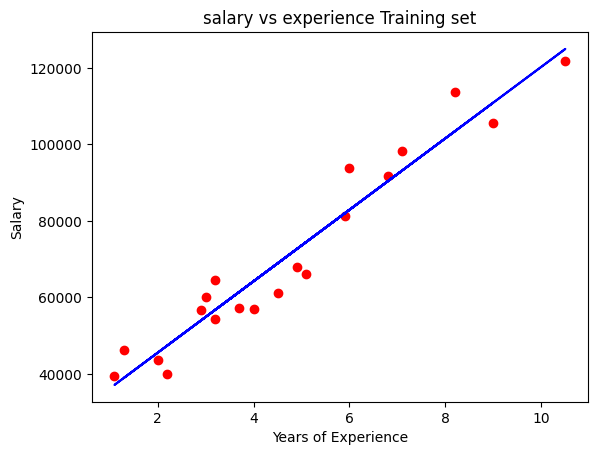

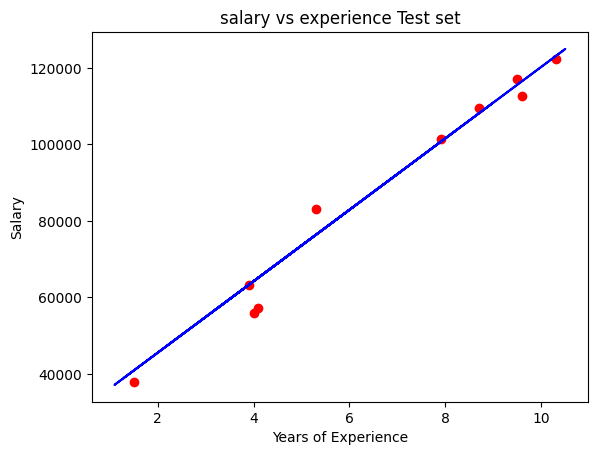

In [24]:
#e) Visualize both train and test data using scatter plot
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train, y_pred_train, color='blue', label='Regression Line')
plt.title('salary vs experience Training set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred_train, color='blue', label='Regression Line')
plt.title('salary vs experience Test set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
